## Importing libraries

In [0]:
import tensorflow as tf
from numpy import genfromtxt
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from numpy import genfromtxt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import  SGD
import pandas as pd
from sklearn import preprocessing

## Read dataset

In [120]:
data = pd.read_csv('House Sales.csv')
data = data.drop(['id', 'date'], axis= 1)

x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
df = pd.DataFrame(x_scaled , columns=data.columns)

df = df.sample(frac=1).reset_index(drop=True)

train = df[0:4000]
test  = df[4000:5000]

train_t = train.price
train_f = train.drop(['price'], axis=1)

test_t = test.price
test_f = test.drop(['price'], axis=1)
print(len(test_f))
print(len(test_t))
print(len(test_f.columns))

1000
1000
18


In [191]:
def build_model():
    model = Sequential()
    model.add(Dense(1500, activation='sigmoid',input_shape=(18,)))
    model.add(Dense(300, activation= 'sigmoid'))

    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=0.008), loss='mse', metrics=['mse'])
    # model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = 0.001), metrics= ['accuracy'])
    return model


model = build_model()
recordModel = model.fit(train_f, train_t, epochs=200, batch_size=8,validation_split = 0.1, verbose=2)

Epoch 1/200
450/450 - 2s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 2/200
450/450 - 2s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3/200
450/450 - 2s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4/200
450/450 - 2s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 5/200
450/450 - 2s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 6/200
450/450 - 2s - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/200
450/450 - 2s - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 8/200
450/450 - 2s - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 9/200
450/450 - 2s - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 10/200
450/450 - 2s - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 11/200
450/450 - 2s - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0048 - val_mse: 0.00

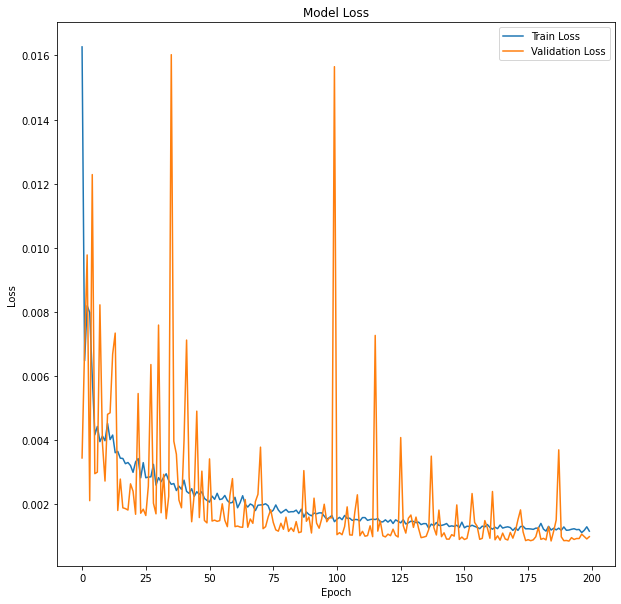

In [192]:
fig_Loss = plt.figure(figsize=(10, 10))
plt.plot(recordModel.history['loss'])
plt.plot(recordModel.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train Loss","Validation Loss"])
plt.show()
fig_Loss.savefig("Loss.png")



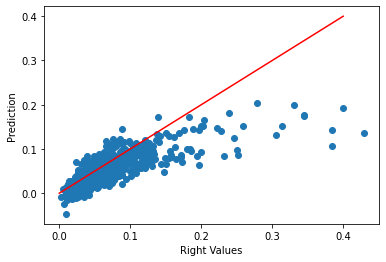

32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Test - Mean Squared Error  0.001076904241926968
Test - Mean Absoulate Error  0.0010947282426059246


In [194]:
# house_data = df.to_numpy()
# test_f = test_f.to_numpy()
# test_t = test_t.to_numpy()

# train_f = train_f.to_numpy()
# train_t = train_t.to_numpy()
Test_Predict = model.predict(test_f).flatten()
# Test_Predict = Test_Predict.reshape(1000,1)
# Test_Predict_ = NewScale2.inverse_transform(Test_Predict)
# TestTarget_ = NewScale2.inverse_transform(test_t)

# fig_Loss = plt.figure(figsize=(10, 10))
plt.scatter(test_t,Test_Predict)
_ = plt.plot([0, 0.4],[0, 0.4], color = 'red')
plt.xlabel('Right Values')
plt.ylabel('Prediction')
# Line = [0, 45]
# plt.xlim(Line)
# plt.ylim(Line)
# plt.plot(Line,Line)
plt.show()
mse, mae = model.evaluate(test_f, test_t)
print("Test - Mean Squared Error " ,mse)
print("Test - Mean Absoulate Error " ,mae)